In [138]:
require(fitdistrplus)
require(repr)
require(actuar)
require(rgenoud)
require(mc2d)
require(gamlss.dist)
options(repr.plot.width=4, repr.plot.height=3)
rm(list=ls())

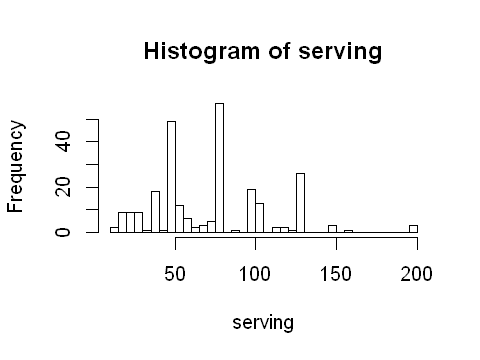

In [139]:
data(groundbeef)
serving <- groundbeef$serving
hist(serving, breaks=50)

In [140]:
fitg <- fitdist(serving, "gamma")
summary(fitg)

Fitting of the distribution ' gamma ' by maximum likelihood 
Parameters : 
        estimate  Std. Error
shape 4.00825257 0.341336046
rate  0.05441911 0.004935468
Loglikelihood:  -1253.625   AIC:  2511.25   BIC:  2518.325 
Correlation matrix:
          shape      rate
shape 1.0000000 0.9384381
rate  0.9384381 1.0000000


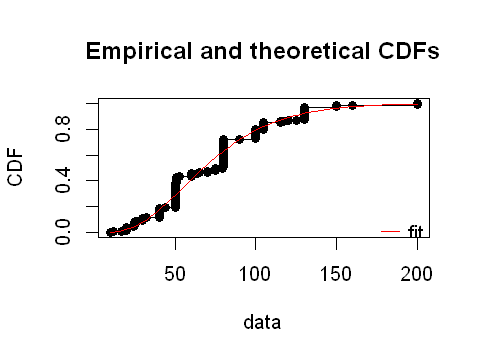

In [141]:
cdfcomp(fitg)

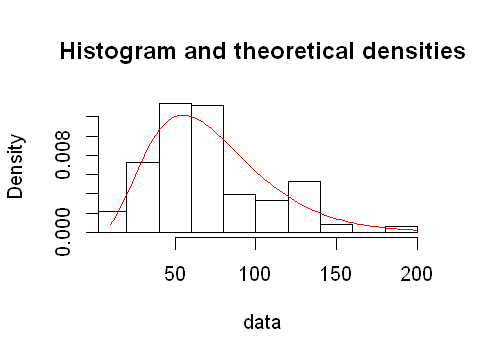

In [142]:
denscomp(fitg, addlegend=FALSE)

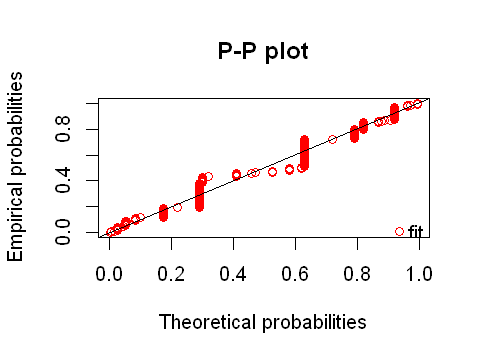

In [143]:
ppcomp(fitg)

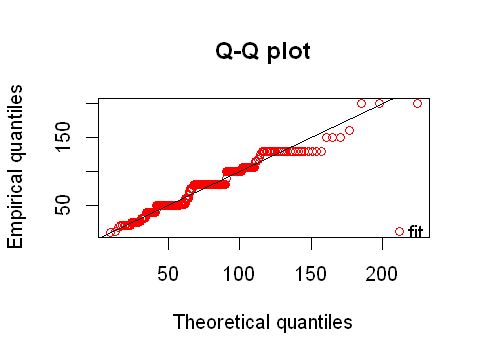

In [144]:
qqcomp(fitg)

In [145]:
print(fitg$cor)
print(fitg$vcov)
print(fitg$estimate)
print(fitg$sd)
print(fitg$loglik)
print(-2*fitg$loglik+2*2)
print(-2*fitg$loglik+2*log(254))
print(fitg$bic)
print(fitg$aic)
print(fitg$n)
print(head(fitg$data, 3))
print(fitg$distname)

          shape      rate
shape 1.0000000 0.9384381
rate  0.9384381 1.0000000
            shape         rate
shape 0.116510296 1.580943e-03
rate  0.001580943 2.435884e-05
     shape       rate 
4.00825257 0.05441911 
      shape        rate 
0.341336046 0.004935468 
[1] -1253.625
[1] 2511.25
[1] 2518.325
[1] 2518.325
[1] 2511.25
[1] 254
[1] 30 10 20
[1] "gamma"


In [146]:
fitgmme <- fitdist(serving, "gamma", method="mme")
summary(fitgmme)

Fitting of the distribution ' gamma ' by matching moments 
Parameters : 
        estimate
shape 4.22848617
rate  0.05741663
Loglikelihood:  -1253.825   AIC:  2511.65   BIC:  2518.724 

In [147]:
fitW <- fitdist(serving, "weibull")
summary(fitW)

Fitting of the distribution ' weibull ' by maximum likelihood 
Parameters : 
       estimate Std. Error
shape  2.185885  0.1045755
scale 83.347679  2.5268626
Loglikelihood:  -1255.225   AIC:  2514.449   BIC:  2521.524 
Correlation matrix:
         shape    scale
shape 1.000000 0.321821
scale 0.321821 1.000000


In [148]:
fitg <- fitdist(serving, "gamma")
fitln <- fitdist(serving, "lnorm")
summary(fitln)

Fitting of the distribution ' lnorm ' by maximum likelihood 
Parameters : 
         estimate Std. Error
meanlog 4.1693701 0.03366988
sdlog   0.5366095 0.02380783
Loglikelihood:  -1261.319   AIC:  2526.639   BIC:  2533.713 
Correlation matrix:
        meanlog sdlog
meanlog       1     0
sdlog         0     1


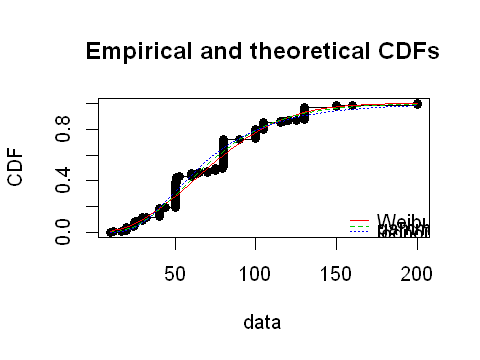

In [149]:
cdfcomp(list(fitW, fitg, fitln), legendtext=c("Weibull", "gamma", "lognormal"))

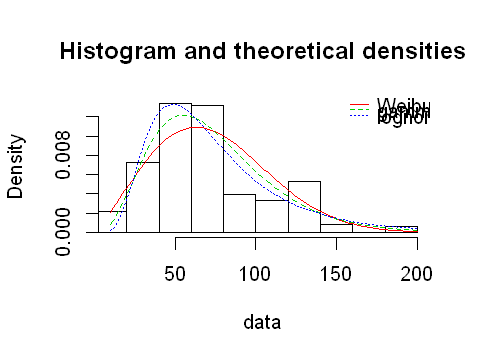

In [150]:
denscomp(list(fitW, fitg, fitln), legendtext=c("Weibull", "gamma", "lognormal"))

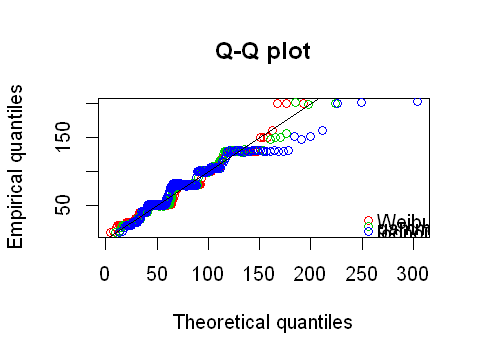

In [151]:
qqcomp(list(fitW, fitg, fitln), legendtext=c("Weibull", "gamma", "lognormal"))

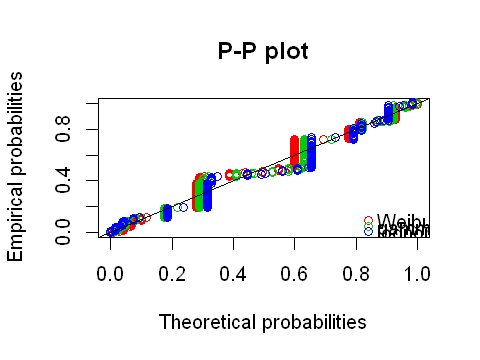

In [152]:
ppcomp(list(fitW, fitg, fitln), legendtext=c("Weibull", "gamma", "lognormal"))

In [153]:
gofstat(list(fitW, fitg, fitln), fitnames=c("Weibull", "gamma", "lognormal"))

Goodness-of-fit statistics
                               Weibull     gamma lognormal
Kolmogorov-Smirnov statistic 0.1396646 0.1281246 0.1493090
Cramer-von Mises statistic   0.6840994 0.6934112 0.8277358
Anderson-Darling statistic   3.5736460 3.5660192 4.5436542

Goodness-of-fit criteria
                                Weibull    gamma lognormal
Akaike's Information Criterion 2514.449 2511.250  2526.639
Bayesian Information Criterion 2521.524 2518.325  2533.713

In [154]:
dgumbel <- function(x, a, b) 1/b*exp((a-x)/b)*exp(-exp((a-x)/b))
pgumbel <- function(q, a, b) exp(-exp((a-q)/b))
qgumbel <- function(p, a, b) a-b*log(-log(p))
fitgumbel <- fitdist(serving, "gumbel", start=list(a=10, b=10))
summary(fitgumbel)

Fitting of the distribution ' gumbel ' by maximum likelihood 
Parameters : 
  estimate Std. Error
a 56.95893   1.924004
b 29.07871   1.431579
Loglikelihood:  -1255.717   AIC:  2515.434   BIC:  2522.509 
Correlation matrix:
          a         b
a 1.0000000 0.3172128
b 0.3172128 1.0000000


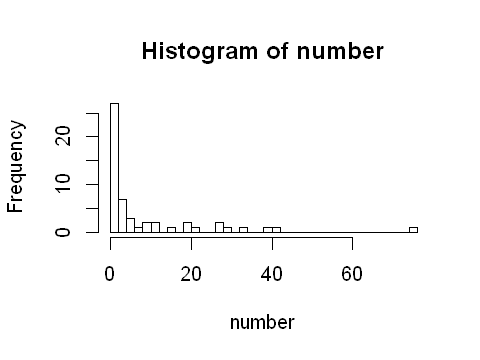

In [155]:
data(toxocara)
number <- toxocara$number
hist(number, 30)

In [156]:
fitp <- fitdist(number, "pois")
summary(fitp)

Fitting of the distribution ' pois ' by maximum likelihood 
Parameters : 
       estimate Std. Error
lambda 8.679245  0.4046719
Loglikelihood:  -507.5334   AIC:  1017.067   BIC:  1019.037 

In [157]:
lamb <- fitp$estimate
sum(log(dpois(x=number,lambda=lamb)))

[1] -507.5334

In [158]:
fitnb <- fitdist(number, "nbinom")

In [159]:
summary(fitnb)

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
      estimate Std. Error
size 0.3971457 0.08289027
mu   8.6802520 1.93501003
Loglikelihood:  -159.3441   AIC:  322.6882   BIC:  326.6288 
Correlation matrix:
              size            mu
size  1.0000000000 -0.0001038553
mu   -0.0001038553  1.0000000000


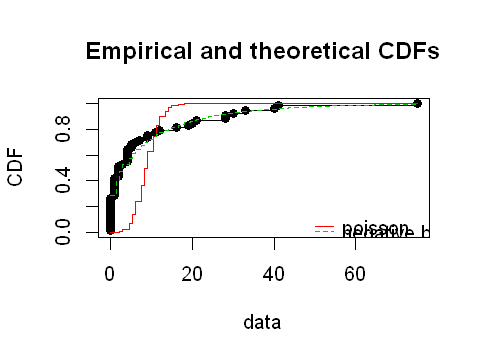

In [160]:
cdfcomp(list(fitp, fitnb), legendtext=c('poisson','negative binomial'))

In [161]:
gofstat(list(fitp, fitnb))

Chi-squared statistic:  31256.96 7.48606 
Degree of freedom of the Chi-squared distribution:  5 4 
Chi-squared p-value:  0 0.1123255 
   the p-value may be wrong with some theoretical counts < 5  
Chi-squared table:
      obscounts theo 1-mle-pois theo 2-mle-nbinom
<= 0         14     0.009014207         15.295027
<= 1          8     0.078236512          5.808596
<= 3          6     1.321767215          6.845015
<= 4          6     2.131297776          2.407815
<= 9          6    29.827829221          7.835196
<= 21         6    19.626223732          8.271110
> 21          7     0.005631339          6.537242

Goodness-of-fit criteria
                               1-mle-pois 2-mle-nbinom
Akaike's Information Criterion   1017.067     322.6882
Bayesian Information Criterion   1019.037     326.6288

In [162]:
fitdist(serving, "gamma", optim.method="SANN")
fitdist(serving, "gamma", optim.method="BFGS")
fitdist(serving, "gamma", optim.method="Nelder-Mead")

Fitting of the distribution ' gamma ' by maximum likelihood 
Parameters:
        estimate  Std. Error
shape 3.96406620 0.337429736
rate  0.05390102 0.004889851

Fitting of the distribution ' gamma ' by maximum likelihood 
Parameters:
        estimate  Std. Error
shape 4.22848161 0.360818429
rate  0.05742147 0.005201142

Fitting of the distribution ' gamma ' by maximum likelihood 
Parameters:
        estimate  Std. Error
shape 4.00825257 0.341336046
rate  0.05441911 0.004935468

In [163]:
set.seed(1234)
mysample <- rexp(100, 5)
mystart <- list(rate=8)
res1 <- fitdist(mysample, dexp, start=mystart, optim.method="Nelder-Mead")
summary(res1)

Fitting of the distribution ' exp ' by maximum likelihood 
Parameters : 
     estimate Std. Error
rate 5.120312  0.5120312
Loglikelihood:  63.32596   AIC:  -124.6519   BIC:  -122.0467 

In [164]:
myoptimize <- function(fn, par, ...){
    res <- optimize(f=fn, ..., maximum=FALSE)
    
    standardres <- c(res, convergence=0, value=res$objective, par=res$minimum, hessian=NA)
    return(standardres)
}

res2 <- fitdist(mysample, "exp", start=mystart, custom.optim=myoptimize, interval=c(0, 100))

In [165]:
summary(res2)

Fitting of the distribution ' exp ' by maximum likelihood 
Parameters : 
     estimate Std. Error
rate 5.120531         NA
Loglikelihood:  63.32596   AIC:  -124.6519   BIC:  -122.0467 

In [166]:
res2$dots

$custom.optim
function (fn, par, ...) 
{
    res <- optimize(f = fn, ..., maximum = FALSE)
    standardres <- c(res, convergence = 0, value = res$objective, 
        par = res$minimum, hessian = NA)
    return(standardres)
}

$interval
[1]   0 100

In [167]:
fit1 <- fitdist(serving, "gamma")
summary(fit1)

Fitting of the distribution ' gamma ' by maximum likelihood 
Parameters : 
        estimate  Std. Error
shape 4.00825257 0.341336046
rate  0.05441911 0.004935468
Loglikelihood:  -1253.625   AIC:  2511.25   BIC:  2518.325 
Correlation matrix:
          shape      rate
shape 1.0000000 0.9384381
rate  0.9384381 1.0000000


In [168]:
mygenoud <- function(fn, par, ...){
    require(rgenoud)
    res <- genoud(fn, starting.values=par, ...)
    standardres <- c(res, convergence=0)
    return(standardres)
}

fit2 <- fitdist(serving, "gamma", custom.optim=mygenoud, nvars=2, Domains=cbind(c(0,0), c(10,10)), boundary.enforcement=1, print.level=1, hessian=TRUE)



Thu Aug 02 21:47:33 2018
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+01 
 0.000000e+00   <=  X2   <=    1.000000e+01 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	122
	(2) Uniform Mutation.................. 	125
	(3) Boundary Mutation................. 	125
	(4) Non-Uniform Mutation.............. 	125
	(5) Polytope Crossover................ 	125
	(6) Simple Crossover.................. 	126
	(7) Whole Non-Uniform Mutation........ 	125
	(8) Heuristic Crossover............... 	126
	(9) Local-Minimum Crossover........... 	0

HARD Maximum Number of Generations: 100
Maximum Nonchanging Generations: 10
Population size       : 1000
Convergence Tolerance: 1.000000e-03

Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
Checking Gradients before Stopping.
Not Using Out of Bounds Individuals But Allowing Trespassing.

Minimization Problem.


Generation#	    Solution Value

      0 	1.253825e+03

In [169]:
summary(fit2)

Fitting of the distribution ' gamma ' by maximum likelihood 
Parameters : 
        estimate  Std. Error
shape 4.00833916 0.341343849
rate  0.05442736 0.004936215
Loglikelihood:  -1253.625   AIC:  2511.25   BIC:  2518.325 
Correlation matrix:
          [,1]      [,2]
[1,] 1.0000000 0.9384395
[2,] 0.9384395 1.0000000


In [170]:
f1c <- fitdist(serving, "gamma", start=list(rate=0.1), fix.arg=list(shape=4))
summary(f1c)

Fitting of the distribution ' gamma ' by maximum likelihood 
Parameters : 
       estimate  Std. Error
rate 0.05431772 0.001703521
Fixed parameters:
      value
shape     4
Loglikelihood:  -1253.625   AIC:  2509.251   BIC:  2512.788 

In [171]:
f1c$fix.arg

$shape
[1] 4

In [172]:
fWmle <- fitdist(serving, "weibull")
summary(fWmle)

Fitting of the distribution ' weibull ' by maximum likelihood 
Parameters : 
       estimate Std. Error
shape  2.185885  0.1045755
scale 83.347679  2.5268626
Loglikelihood:  -1255.225   AIC:  2514.449   BIC:  2521.524 
Correlation matrix:
         shape    scale
shape 1.000000 0.321821
scale 0.321821 1.000000


In [173]:
gofstat(fWmle)

Goodness-of-fit statistics
                             1-mle-weibull
Kolmogorov-Smirnov statistic     0.1396646
Cramer-von Mises statistic       0.6840994
Anderson-Darling statistic       3.5736460

Goodness-of-fit criteria
                               1-mle-weibull
Akaike's Information Criterion      2514.449
Bayesian Information Criterion      2521.524

In [174]:
fWqme <- fitdist(serving, "weibull", method="qme", probs=c(0.25, 0.75))
summary(fWqme)

Fitting of the distribution ' weibull ' by matching quantiles 
Parameters : 
       estimate
shape  2.268699
scale 86.590853
Loglikelihood:  -1256.129   AIC:  2516.258   BIC:  2523.332 

In [175]:
print(quantile(serving, probs=c(0.25, 0.75)))
print(qweibull(0.25, shape=2.26869876243628, scale=86.5908533238999))
print(qweibull(0.75, shape=2.26869876243628, scale=86.5908533238999))

25% 75% 
 50 100 
[1] 50.0001
[1] 99.99983


In [176]:
require(actuar)
x4 <- rpareto(1000, 6, 2)
memp2 <- function(x, order) mean(x^order)
fP <- fitdist(x4, "pareto", method="mme", order=c(1, 2), memp="memp2", start=list(shape=10, scale=10), lower=1, upper=Inf)
summary(fP)

Fitting of the distribution ' pareto ' by matching moments 
Parameters : 
      estimate
shape 4.514973
scale 1.444969
Loglikelihood:  -78.30379   AIC:  160.6076   BIC:  170.4231 

In [177]:
fP$estimate

shape    scale 
4.514973 1.444969

In [178]:
dpareto(1,shape=6.92092883131389, scale=2.33803360268846)
6.92092883131389*2.33803360268846^6.92092883131389/(1+2.33803360268846)^(6.92092883131389+1)

[1] 0.1763687

[1] 0.1763687

In [179]:
mean(x4)
mean(x4^2)
2.33803360268846/(6.92092883131389-1)
2.33803360268846^2*2/((6.92092883131389-1)*(6.92092883131389-2))

[1] 0.4110885

[1] 0.4723796

[1] 0.3948762

[1] 0.3752274

In [180]:
(f1 <- fitdist(serving, "weibull", method="mge", gof="CvM"))
(f2 <- fitdist(serving, "weibull", method="mge", gof="KS"))
(f3 <- fitdist(serving, "weibull", method="mge", gof="AD"))
(f4 <- fitdist(serving, "weibull", method="mge", gof="ADR"))
(f5 <- fitdist(serving, "weibull", method="mge", gof="ADL"))
(f6 <- fitdist(serving, "weibull", method="mge", gof="AD2R"))
(f7 <- fitdist(serving, "weibull", method="mge", gof="AD2L"))
(f8 <- fitdist(serving, "weibull", method="mge", gof="AD2"))

Fitting of the distribution ' weibull ' by maximum goodness-of-fit 
Parameters:
       estimate
shape  2.093204
scale 82.660014

Fitting of the distribution ' weibull ' by maximum goodness-of-fit 
Parameters:
       estimate
shape  2.065634
scale 81.450487

Fitting of the distribution ' weibull ' by maximum goodness-of-fit 
Parameters:
       estimate
shape  2.125473
scale 82.890260

Fitting of the distribution ' weibull ' by maximum goodness-of-fit 
Parameters:
       estimate
shape  2.072087
scale 82.761868

Fitting of the distribution ' weibull ' by maximum goodness-of-fit 
Parameters:
       estimate
shape  2.197498
scale 82.016005

Fitting of the distribution ' weibull ' by maximum goodness-of-fit 
Parameters:
      estimate
shape  1.90328
scale 81.33464

Fitting of the distribution ' weibull ' by maximum goodness-of-fit 
Parameters:
       estimate
shape  2.483836
scale 78.252113

Fitting of the distribution ' weibull ' by maximum goodness-of-fit 
Parameters:
       estimate
shape  2.081168
scale 85.281194

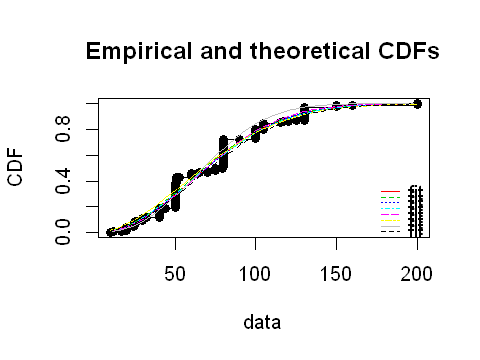

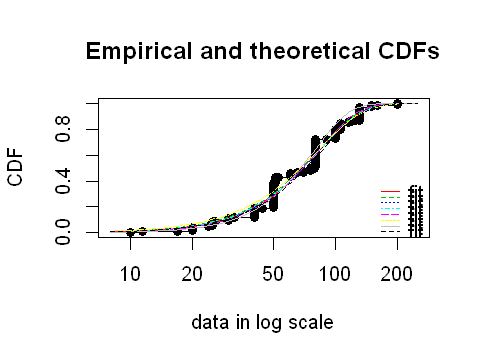

In [181]:
cdfcomp(list(f1,f2,f3,f4,f5,f6,f7,f8))
cdfcomp(list(f1,f2,f3,f4,f5,f6,f7,f8), xlogscale=TRUE, xlim=c(8,250), verticals=TRUE)

In [182]:
set.seed(1234)
u <- runif(50, min=5, max=10)
fumle <- fitdist(u, "unif", method="mle")
summary(fumle)
gofstat(fumle)

Fitting of the distribution ' unif ' by maximum likelihood 
Parameters : 
    estimate Std. Error
min 5.047479         NA
max 9.960752         NA
Loglikelihood:  NA   AIC:  NA   BIC:  NA 
Correlation matrix:
[1] NA


Goodness-of-fit statistics
                             1-mle-unif
Kolmogorov-Smirnov statistic  0.1340723
Cramer-von Mises statistic    0.1566892
Anderson-Darling statistic          Inf

Goodness-of-fit criteria
                               1-mle-unif
Akaike's Information Criterion         NA
Bayesian Information Criterion         NA

In [183]:
fuCvM <- fitdist(u, "unif", method="mge", gof="CvM")
summary(fuCvM)
gofstat(fuCvM)

Fitting of the distribution ' unif ' by maximum goodness-of-fit 
Parameters : 
    estimate
min        0
max        1
Loglikelihood:  -Inf   AIC:  Inf   BIC:  Inf 

Goodness-of-fit statistics
                             1-mge-unif
Kolmogorov-Smirnov statistic    1.00000
Cramer-von Mises statistic     16.66667
Anderson-Darling statistic          Inf

Goodness-of-fit criteria
                               1-mge-unif
Akaike's Information Criterion        Inf
Bayesian Information Criterion        Inf

In [184]:
fuKS <- fitdist(u, "unif", method="mge", gof="KS")
summary(fuKS)
gofstat(fuKS)

Fitting of the distribution ' unif ' by maximum goodness-of-fit 
Parameters : 
    estimate
min        0
max        1
Loglikelihood:  -Inf   AIC:  Inf   BIC:  Inf 

Goodness-of-fit statistics
                             1-mge-unif
Kolmogorov-Smirnov statistic    1.00000
Cramer-von Mises statistic     16.66667
Anderson-Darling statistic          Inf

Goodness-of-fit criteria
                               1-mge-unif
Akaike's Information Criterion        Inf
Bayesian Information Criterion        Inf

In [185]:
set.seed(1234)
x2 <- rnorm(100, 1e-4, 2e-4)
for(i in 0:6)
    cat(i, try(fitdist(x2*10^i, "cauchy", "method"="mle")$estimate, silent=TRUE), "\n")

<simpleError in optim(par = vstart, fn = fnobj, fix.arg = fix.arg, obs = data,     gr = gradient, ddistnam = ddistname, hessian = TRUE, method = meth,     lower = lower, upper = upper, ...): non-finite finite-difference value [2]>
0 Error in fitdist(x2 * 10^i, "cauchy", method = "mle") : 
  the function mle failed to estimate the parameters, 
                with the error code 100

 
<simpleError in optim(par = vstart, fn = fnobj, fix.arg = fix.arg, obs = data,     gr = gradient, ddistnam = ddistname, hessian = TRUE, method = meth,     lower = lower, upper = upper, ...): non-finite finite-difference value [2]>
1 Error in fitdist(x2 * 10^i, "cauchy", method = "mle") : 
  the function mle failed to estimate the parameters, 
                with the error code 100

 
2 0.001870693 0.01100646 
3 0.01871473 0.1100713 
4 0.1870693 1.100646 
5 1.876032 11.0131 
6 18.76032 110.131 


In [186]:
data(endosulfan)
ATV <- subset(endosulfan, group == "NonArthroInvert")$ATV
log10ATV <- log10(ATV)
fln <- fitdist(log10ATV, "norm")
summary(fln)
quantile(fln, probs=0.05)
quantile(fln, probs=c(0.05,0.1,0.2))

Fitting of the distribution ' norm ' by maximum likelihood 
Parameters : 
      estimate Std. Error
mean 3.2648617  0.2311200
sd   0.9244801  0.1634257
Loglikelihood:  -21.44664   AIC:  46.89327   BIC:  48.43845 
Correlation matrix:
     mean sd
mean    1  0
sd      0  1


Estimated quantiles for each specified probability (non-censored data)
           p=0.05
estimate 1.744227

Estimated quantiles for each specified probability (non-censored data)
           p=0.05    p=0.1  p=0.2
estimate 1.744227 2.080093 2.4868

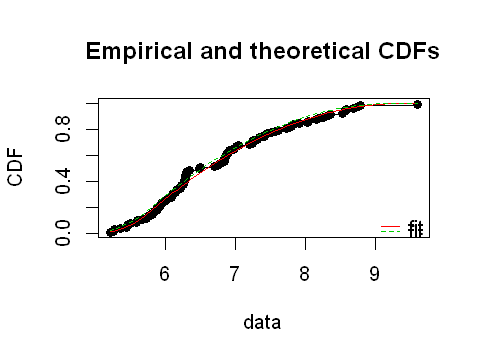

In [194]:
set.seed(1234)
require(mc2d)
t <- rtriang(100, min=5, mode=6, max=10)
fCvM <- fitdist(t, "triang", method="mge", start=list(min=4, mode=6, max=9), gof="CvM")
fKS <- fitdist(t, "triang", method="mge", start=list(min=4, mode=6, max=9), gof="KS")
cdfcomp(list(fCvM,fKS))

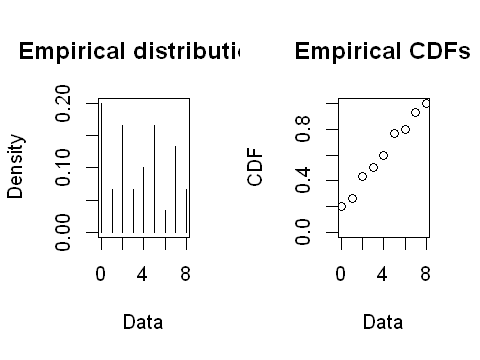

In [202]:
require(gamlss.dist)
set.seed(1234)
x <- rZIP(n=30, mu=5, sigma=0.2)
plotdist(x, discrete=TRUE)

In [203]:
fitzip <- fitdist(x, "ZIP", start=list(mu=4, sigma=0.15), discrete=TRUE, optim.method="L-BFGS-B", lower=c(0,0), upper=c(Inf, 1))
summary(fitzip)

Fitting of the distribution ' ZIP ' by maximum likelihood 
Parameters : 
       estimate Std. Error
mu    4.3166139  0.4341218
sigma 0.1891806  0.0741692
Loglikelihood:  -67.13886   AIC:  138.2777   BIC:  141.0801 
Correlation matrix:
              mu      sigma
mu    1.00000000 0.06418863
sigma 0.06418863 1.00000000


Chi-squared statistic:  3.579721 35.91516 
Degree of freedom of the Chi-squared distribution:  3 4 
Chi-squared p-value:  0.3105689 3.012342e-07 
   the p-value may be wrong with some theoretical counts < 5  
Chi-squared table:
     obscounts theo 1-mle-ZIP theo 2-mle-pois
<= 0         6       6.000030       0.9059215
<= 2         7       4.425490       8.7194944
<= 4         5       9.047502      12.1379326
<= 5         5       4.054138       3.9650580
<= 7         5       4.715296       3.4694258
> 7          2       1.757544       0.8021677

Goodness-of-fit criteria
                               1-mle-ZIP 2-mle-pois
Akaike's Information Criterion  138.2777   153.7397
Bayesian Information Criterion  141.0801   155.1409

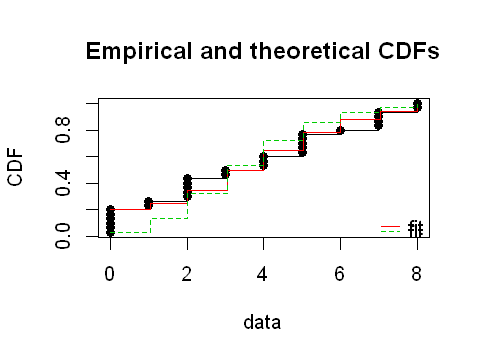

In [205]:
fitp <- fitdist(x, "pois")
cdfcomp(list(fitzip, fitp))
gofstat(list(fitzip, fitp))

In [236]:
x <- c(2.3,0.1,2.7,2.2,0.4,2.6,0.2,1,7.3,3.2,0.8,1.2,33.7,14,21.4,7.7,1,1.9,0.7,12.6,3.2,7.3,4.9,4000,2.5,6.7,3,63,6,1.6,10.1,1.2,1.5,1.2,30,3.2,3.5,1.2,0.2,1.9,0.7,17,
2.8,4.8,1.3,3.7,0.2,1.8,2.6,5.9,2.6,6.3,1.4,0.8)
ft_llogis <- fitdist(x, "llogis")
summary(ft_llogis)

Fitting of the distribution ' llogis ' by maximum likelihood 
Parameters : 
      estimate Std. Error
shape 1.221755  0.1413398
scale 2.701676  0.5117272
Loglikelihood:  -157.3022   AIC:  318.6045   BIC:  322.5824 
Correlation matrix:
            shape       scale
shape  1.00000000 -0.02096857
scale -0.02096857  1.00000000


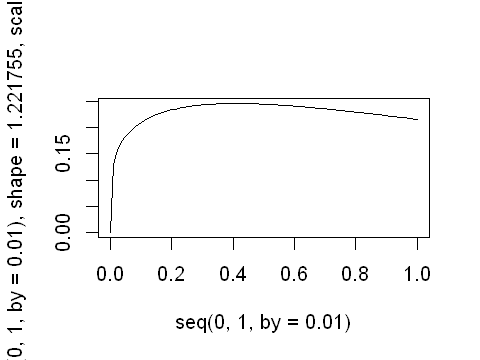

In [230]:
plot(seq(0,1, by=0.01),dllogis(seq(0,1, by=0.01), shape=1.221755, scale=2.701676), "l")

In [235]:
x <- c(0.3837053, 0.8576858, 0.3552237, 0.6226119, 0.4783756, 0.3139799, 0.4051403,
0.4537631, 0.4711057, 0.5647414, 0.6479617, 0.7134207, 0.5259464, 0.5949068,
0.3509200, 0.3783077, 0.5226465, 1.0241043, 0.4384580, 1.3341520)
ft_iw <- fitdist(x, "invweibull")
summary(ft_iw)

Fitting of the distribution ' invweibull ' by maximum likelihood 
Parameters : 
      estimate Std. Error
shape 3.549184 0.63538332
scale 0.449719 0.02980818
Loglikelihood:  6.142828   AIC:  -8.285657   BIC:  -6.294192 
Correlation matrix:
           shape      scale
shape  1.0000000 -0.3108299
scale -0.3108299  1.0000000


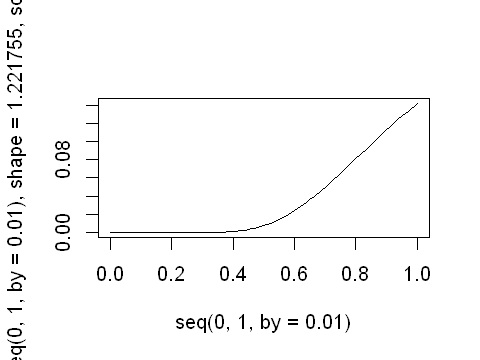

In [234]:
plot(seq(0,1, by=0.01),dinvweibull(seq(0,1, by=0.01), shape=1.221755, scale=2.701676), "l")